In [450]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import power_transform

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**OMAR MAAREF SPARK FOUNDATION**

In [451]:
data=pd.DataFrame({
    'Hours':[
2.5,
5.1,
3.2,
8.5,
3.5,
1.5,
9.2,
5.5,
8.3,
2.7,
7.7,
5.9,
4.5,
3.3,
1.1,
8.9,
2.5,
1.9,
6.1,
7.4,
2.7,
4.8,
3.8,
6.9,
7.8,],
    'Scores':[
21,
47,
27,
75,
30,
20,
88,
60,
81,
25,
85,
62,
41,
42,
17,
95,
30,
24,
67,
69,
30,
54,
35,
76,
86]});

since the data set is just too small lets just take 2 examples out for testing purposes

In [452]:
test_data=data[(data.Hours==5.1) | (data.Hours==9.2)]
data=data[(data.Hours!=5.1) | (data.Hours!=9.2)]
data2=data
data2

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


visualization of the distribution plot of our features

(25, 2)

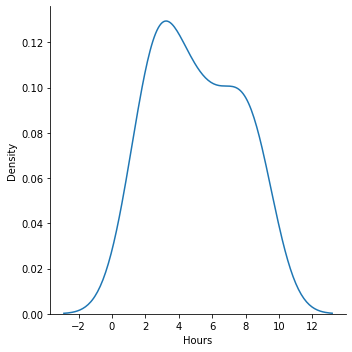

In [454]:
sns.displot(data.Hours,kind="kde")
data.shape

(25, 2)

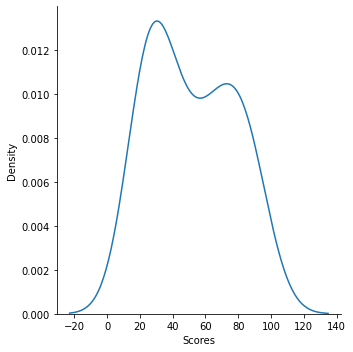

In [455]:
sns.displot(data.Scores,kind="kde")
data.shape

conclusion1 : their are extremely similar

In [456]:
data.isnull().sum().sum()

0

not null values in our data

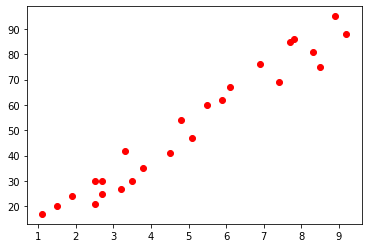

In [457]:
plt.scatter(data.Hours,data.Scores,c="red")

an extreme case of corrolation is detected between our features

**lets begin training**

In [460]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
lasso = make_pipeline(StandardScaler(), linear_model.Lasso(alpha =0.005))
from sklearn.svm import SVR
SVM = make_pipeline(StandardScaler(), SVR(epsilon=0.2))
from sklearn.kernel_ridge import KernelRidge
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

import xgboost as xgb
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             verbosity = 0, nthread = -1)
models=[lasso,SVM,KRR,model_xgb]

they all behaved more or less the same except SVM wich performed very poorly

In [464]:
for model in models:
    print(np.mean(np.sqrt(-cross_val_score(model, data.Hours.values.reshape(-1,1), data.Scores,cv=25,scoring="neg_mean_squared_error"))), "  ")


5.411998533092672   
18.787997723672795   
5.6220769417520025   
7.08469223022461   


In [465]:
for model in models:
    model.fit(data.Hours.values.reshape(-1,1), data.Scores)


In [468]:
for model in models:
    print(model.predict((test_data.Hours).values.reshape(-1,1)),"**",test_data.Scores.values.reshape(-1,1))


[52.34009285 92.41260084] ** [[47]
 [88]]
[49.84424287 56.35832761] ** [[47]
 [88]]
[52.1018442  92.77221099] ** [[47]
 [88]]
[47.33458 91.33379] ** [[47]
 [88]]


svm also failed our testing set so we shall remove it from our stacking /ensambling list

In [485]:
models.remove(SVM)

In [488]:
pred=[]
for model in models:
    pred.append(model.predict(np.asarray([[9.25]])))
    print(model.predict(np.asarray([[9.25]])))
np.mean(pred)

[92.90128996]
[93.27582171]
[91.33379]


92.50363510190523

***the final resulat is 92.5***